# Installing Packages #

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')
install.packages('tidyr')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(dslabs)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Data #

## Loading data into R ##

In [105]:

parliament<-read.csv2('folketingsvalg.csv')
str(parliament)
parliament

'data.frame':	6 obs. of  11 variables:
 $ år   : int  1898 1901 1903 1906 1909 1910
 $ fv   : chr  "23" "16" "12" "9" ...
 $ h    : int  16 8 12 12 21 13
 $ vr   : chr  "63" "76" "73" "56" ...
 $ s    : int  12 14 16 24 24 24
 $ vr.c : chr  "na" "na" "na" "na" ...
 $ vr.n : chr  "na" "na" "na" "na" ...
 $ v    : chr  "na" "na" "na" "na" ...
 $ r    : chr  "na" "na" "na" "9" ...
 $ l    : int  0 0 1 4 6 0
 $ i.alt: int  114 114 114 114 114 114


år,fv,h,vr,s,vr.c,vr.n,v,r,l,i.alt
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1898,23,16,63,12,na,na,na,na,0,114
1901,16,8,76,14,na,na,na,na,0,114
1903,12,12,73,16,na,na,na,na,1,114
1906,9,12,56,24,na,na,na,9,4,114
1909,11,21,2,24,27,8,na,15,6,114
1910,na,13,na,24,na,na,57,20,0,114


A note on the shortenings 
H is the party Højre
S is socialdemokraterne
all of the others are ofshoots of the party Venstre 

In [23]:
worker <- read.csv2('arbejdsnedlukninger.csv')
worker
colnames(worker)

år,arbejdsnedlukninger,strejke,lockout,blandet.eller.ved.ikke
<int>,<int>,<int>,<int>,<int>
1897,111,77,11,23
1898,147,136,5,6
1899,98,81,3,14
1900,82,62,5,15
1901,57,40,11,6
1902,68,54,6,8
1903,61,39,4,18
1904,86,69,3,14
1905,75,61,3,11


[1] "år"                     "arbejdsnedlukninger"    "strejke"               
[4] "lockout"                "blandet.eller.ved.ikke"

In [43]:
parliament$before_election <- c(parliament$år-1)
parliament$after_election <- c(parliament$år+1)
parliament
str(parliament)

år,fv,h,vr,s,vr.c,vr.n,v,r,l,i.alt,before_election,after_election
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1898,23,16,63,12,na,na,na,na,0,114,1897,1899
1901,16,8,76,14,na,na,na,na,0,114,1900,1902
1903,12,12,73,16,na,na,na,na,1,114,1902,1904
1906,9,12,56,24,na,na,na,9,4,114,1905,1907
1909,11,21,2,24,27,8,na,15,6,114,1908,1910
1910,na,13,na,24,na,na,57,20,0,114,1909,1911


'data.frame':	6 obs. of  13 variables:
 $ år             : int  1898 1901 1903 1906 1909 1910
 $ fv             : chr  "23" "16" "12" "9" ...
 $ h              : int  16 8 12 12 21 13
 $ vr             : chr  "63" "76" "73" "56" ...
 $ s              : int  12 14 16 24 24 24
 $ vr.c           : chr  "na" "na" "na" "na" ...
 $ vr.n           : chr  "na" "na" "na" "na" ...
 $ v              : chr  "na" "na" "na" "na" ...
 $ r              : chr  "na" "na" "na" "9" ...
 $ l              : int  0 0 1 4 6 0
 $ i.alt          : int  114 114 114 114 114 114
 $ before_election: num  1897 1900 1902 1905 1908 ...
 $ after_election : num  1899 1902 1904 1907 1910 ...


In [81]:
worker_be <- worker[c(1,4,6,9,12,13), ]
colnames(worker_be) <- c('before_election','arbejdsnedlukninger','strejke','lockout','blandet.eller.ved.ikke')
worker_be

worker_ae<-worker[c(3,6,8,11,14),]
colnames(worker_ae) <- c('after_election','arbejdsnedlukninger','strejke','lockout','blandet.eller.ved.ikke')
worker_ae[nrow(worker_ae) + 1,] <- c(1911, 1, 1, 1, 1)
worker_ae

# i renamed the column year so that i could merge the two dataframes correctly

,before_election,arbejdsnedlukninger,strejke,lockout,blandet.eller.ved.ikke
,<int>,<int>,<int>,<int>,<int>
1,1897,111,77,11,23
4,1900,82,62,5,15
6,1902,68,54,6,8
9,1905,75,61,3,11
12,1908,122,98,2,22
13,1909,65,40,7,18


,after_election,arbejdsnedlukninger,strejke,lockout,blandet.eller.ved.ikke
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1899,98,81,3,14
6,1902,68,54,6,8
8,1904,86,69,3,14
11,1907,105,79,4,22
14,1910,71,61,3,7
6.1,1911,1,1,1,1


In [82]:
df_before_election <- merge(parliament,worker_be,by="before_election")
df_before_election
df_after_election <- merge(parliament,worker_ae,by="after_election")
df_after_election <- df_after_election[-6,]
df_after_election
#i had to remove the last line of after election data as i don't have data for workclosures in 1911

before_election,år,fv,h,vr,s,vr.c,vr.n,v,r,l,i.alt,after_election,arbejdsnedlukninger,strejke,lockout,blandet.eller.ved.ikke
<dbl>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1897,1898,23,16,63,12,na,na,na,na,0,114,1899,111,77,11,23
1900,1901,16,8,76,14,na,na,na,na,0,114,1902,82,62,5,15
1902,1903,12,12,73,16,na,na,na,na,1,114,1904,68,54,6,8
1905,1906,9,12,56,24,na,na,na,9,4,114,1907,75,61,3,11
1908,1909,11,21,2,24,27,8,na,15,6,114,1910,122,98,2,22
1909,1910,na,13,na,24,na,na,57,20,0,114,1911,65,40,7,18


,after_election,år,fv,h,vr,s,vr.c,vr.n,v,r,l,i.alt,before_election,arbejdsnedlukninger,strejke,lockout,blandet.eller.ved.ikke
,<dbl>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1899,1898,23,16,63,12,na,na,na,na,0,114,1897,98,81,3,14
2,1902,1901,16,8,76,14,na,na,na,na,0,114,1900,68,54,6,8
3,1904,1903,12,12,73,16,na,na,na,na,1,114,1902,86,69,3,14
4,1907,1906,9,12,56,24,na,na,na,9,4,114,1905,105,79,4,22
5,1910,1909,11,21,2,24,27,8,na,15,6,114,1908,71,61,3,7


# Plot and tests #

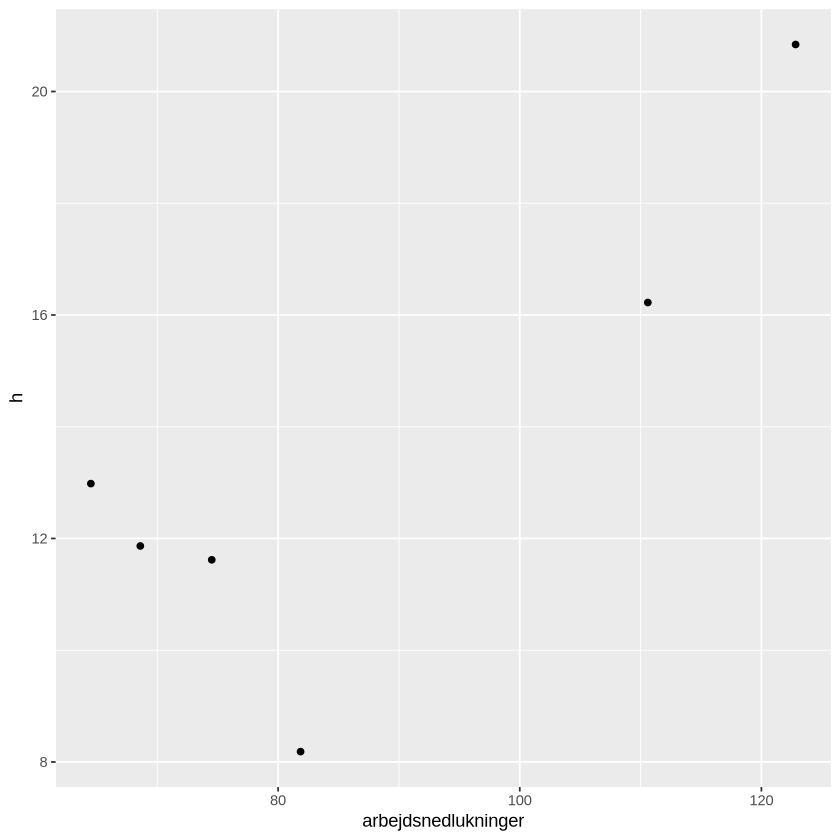

In [88]:
ggplot(df_before_election,
       aes(x = arbejdsnedlukninger,
           y = h))+
    geom_point(position = 'jitter')

## Cor.test ##

In [89]:
#before election: højre
cor.test(df_before_election$lockout, df_before_election$h)
cor.test(df_before_election$strejke, df_before_election$h)
cor.test(df_before_election$arbejdsnedlukninger, df_before_election$h)


	Pearson's product-moment correlation

data:  df_before_election$lockout and df_before_election$h
t = -0.21821, df = 4, p-value = 0.8379
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8455912  0.7709623
sample estimates:
       cor 
-0.1084616 



	Pearson's product-moment correlation

data:  df_before_election$strejke and df_before_election$h
t = 2.229, df = 4, p-value = 0.08971
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1698702  0.9699611
sample estimates:
      cor 
0.7443004 



	Pearson's product-moment correlation

data:  df_before_election$arbejdsnedlukninger and df_before_election$h
t = 2.4783, df = 4, p-value = 0.06834
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09053951  0.97438329
sample estimates:
      cor 
0.7782028 


In [93]:
#before election: soc.dem
cor.test(df_before_election$lockout, df_before_election$s)
cor.test(df_before_election$strejke, df_before_election$s)
cor.test(df_before_election$arbejdsnedlukninger, df_before_election$s)


	Pearson's product-moment correlation

data:  df_before_election$lockout and df_before_election$s
t = -1.7867, df = 4, p-value = 0.1485
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9591769  0.3164128
sample estimates:
       cor 
-0.6662281 



	Pearson's product-moment correlation

data:  df_before_election$strejke and df_before_election$s
t = -0.056901, df = 4, p-value = 0.9574
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8210505  0.8016237
sample estimates:
        cor 
-0.02843903 



	Pearson's product-moment correlation

data:  df_before_election$arbejdsnedlukninger and df_before_election$s
t = -0.24473, df = 4, p-value = 0.8187
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8493033  0.7655651
sample estimates:
       cor 
-0.1214591 



	Pearson's product-moment correlation

data:  df_before_election$s and df_before_election$lockout
t = -1.7867, df = 4, p-value = 0.1485
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9591769  0.3164128
sample estimates:
       cor 
-0.6662281 



	Pearson's product-moment correlation

data:  df_before_election$s and df_before_election$strejke
t = -0.056901, df = 4, p-value = 0.9574
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8210505  0.8016237
sample estimates:
        cor 
-0.02843903 



	Pearson's product-moment correlation

data:  df_before_election$s and df_before_election$arbejdsnedlukninger
t = -0.24473, df = 4, p-value = 0.8187
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8493033  0.7655651
sample estimates:
       cor 
-0.1214591 


In [91]:
#after election: Højre
cor.test(df_after_election$h, df_after_election$lockout)
cor.test(df_after_election$h, df_after_election$strejke)
cor.test(df_after_election$h, df_after_election$arbejdsnedlukninger)


	Pearson's product-moment correlation

data:  df_after_election$h and df_after_election$lockout
t = -1.9542, df = 3, p-value = 0.1457
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9821552  0.3941405
sample estimates:
       cor 
-0.7483575 



	Pearson's product-moment correlation

data:  df_after_election$h and df_after_election$strejke
t = 0.29237, df = 3, p-value = 0.7891
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8390322  0.9144287
sample estimates:
      cor 
0.1664455 



	Pearson's product-moment correlation

data:  df_after_election$h and df_after_election$arbejdsnedlukninger
t = -0.06188, df = 3, p-value = 0.9546
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8899369  0.8740970
sample estimates:
        cor 
-0.03570358 


In [92]:
#after election: soc.dem
cor.test(df_after_election$s, df_after_election$lockout)
cor.test(df_after_election$s, df_after_election$strejke)
cor.test(df_after_election$s, df_after_election$arbejdsnedlukninger)


	Pearson's product-moment correlation

data:  df_after_election$s and df_after_election$lockout
t = -0.35977, df = 3, p-value = 0.7429
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9204786  0.8273431
sample estimates:
       cor 
-0.2033723 



	Pearson's product-moment correlation

data:  df_after_election$s and df_after_election$strejke
t = 0, df = 3, p-value = 1
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8822664  0.8822664
sample estimates:
cor 
  0 



	Pearson's product-moment correlation

data:  df_after_election$s and df_after_election$arbejdsnedlukninger
t = 0.11346, df = 3, p-value = 0.9168
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8668945  0.8959621
sample estimates:
       cor 
0.06536584 


## Cor ##

In [101]:
cor(df_before_election[, c("h", "lockout", "strejke", "arbejdsnedlukninger")])

,h,lockout,strejke,arbejdsnedlukninger
h,1.0000000,-0.10846161,0.7443004,0.77820284
lockout,-0.1084616,1.00000000,-0.2536251,-0.00175381
strejke,0.7443004,-0.25362510,1.0000000,0.95367706
arbejdsnedlukninger,0.7782028,-0.00175381,0.9536771,1.00000000


In [102]:
cor(df_before_election[, c("s", "lockout", "strejke", "arbejdsnedlukninger")])

,s,lockout,strejke,arbejdsnedlukninger
s,1.00000000,-0.66622814,-0.02843903,-0.12145912
lockout,-0.66622814,1.00000000,-0.25362510,-0.00175381
strejke,-0.02843903,-0.25362510,1.00000000,0.95367706
arbejdsnedlukninger,-0.12145912,-0.00175381,0.95367706,1.00000000


In [103]:
cor(df_after_election[, c("h", "lockout", "strejke", "arbejdsnedlukninger")])

,h,lockout,strejke,arbejdsnedlukninger
h,1.00000000,-0.7483575,0.1664455,-0.03570358
lockout,-0.74835746,1.0000000,-0.5681847,-0.39467224
strejke,0.16644548,-0.5681847,1.0000000,0.96596419
arbejdsnedlukninger,-0.03570358,-0.3946722,0.9659642,1.00000000


In [104]:
cor(df_after_election[, c("s", "lockout", "strejke", "arbejdsnedlukninger")])

,s,lockout,strejke,arbejdsnedlukninger
s,1.00000000,-0.2033723,0.0000000,0.06536584
lockout,-0.20337230,1.0000000,-0.5681847,-0.39467224
strejke,0.00000000,-0.5681847,1.0000000,0.96596419
arbejdsnedlukninger,0.06536584,-0.3946722,0.9659642,1.00000000


None of the tests show any correlation between work closures of any kind and the amount of mandates that Højre or Socialdemokraterne had as none of the p-values are below 0.05 and none of the r-values are close to either -1 or 1
The closest p-value I got was 0,068 which was the general work closures and the party Højre and the closet r-value is 0,78 in the same categori 